# MRI Dementia Classification - CNN Model
This model is used for MRI classification of dementia with 4 known stages (Non-Demented, Mild Demented, Moderate Demented and Very Mild Demented). Severe onset dementia is known as Alzheimer's Disease which will not be covered in this analysis. All data sourced from https://www.kaggle.com/datasets/matthewhema/mri-dementia-augmentation-no-data-leak

In [1]:
# Import Dependencies and Libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D, MaxPooling2D, Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [2]:
# Load MRI Dataset
import kagglehub

# Download latest version
path = kagglehub.dataset_download("matthewhema/mri-dementia-augmentation-no-data-leak")

print("Path to dataset files:", path)

/opt/anaconda3/envs/dev/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /Users/mattle/.cache/kagglehub/datasets/matthewhema/mri-dementia-augmentation-no-data-leak/versions/1


## Image Processing

Here we're leveraging a function called ImageDataGenerator() from the Tensor library to combine all of the operations of rescaling, setting our target size, batch size, etc to prep them into respective bins - Train, Test and Validation. 

In [3]:
# Resize all input images to 224x224
image_size = (224, 224)

#Number of images the model processes before updating weights
batch_size = 32

# Set local data paths
train_dir = path + '/Train/Train'
val_dir = path + '/Val/Val'
test_dir = path + '/Test/Test'

# Store ImageDataGenerator parameters in a dictionary
imageDataGenerator_params = {
    'rescale': 1./255
}

In [4]:
# Image Generators 

# Rescaling [0,1] for neural networks to process normalized values
train_datagen = ImageDataGenerator(imageDataGenerator_params)
val_datagen = ImageDataGenerator(imageDataGenerator_params)
test_datagen = ImageDataGenerator(imageDataGenerator_params)

# Create Generators for Train, Val and Test
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


Found 11350 images belonging to 4 classes.
Found 960 images belonging to 4 classes.
Found 960 images belonging to 4 classes.


---

## Create the Architecture of the Model 
In this section, simply uncomment the block of code (/ + CMND) for which version of the model you want to run. Be sure to change the version number when saving the filenames down below

### CNN Model V1 // F1 Score 0.51
Start with a basic Convcoluation layer and dense layer

In [88]:
# # Build the CNN Model from scratch
# model = Sequential([
#     # Input Layer
#     Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
#     MaxPooling2D((2, 2)),

#     # Hidden Layers
#     Conv2D(64, (3, 3), activation='relu'),
#     MaxPooling2D((2, 2)),

#     # Flattening Layer and Dense Layers
#     Flatten(),
#     Dense(256, activation='relu'),
#     Dropout(0.2),
#     Dense(4, activation='softmax')  # 4 output classes
# ])

# # Compile the model
# model.compile(optimizer=Adam(learning_rate=1e-4),
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])


### CNN Model V2 // F1 Score 0.96
Add another convolution layer and dense later doubling the number of neurons

In [5]:
# Build the CNN Model from scratch
model = Sequential([
    # Input Layer
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),

    # Hidden Layers
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Flattening Layer and Dense Layers
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(4, activation='softmax')  # 4 output classes
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/opt/anaconda3/envs/dev/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### VGG-16 // F1 Score 0.51
VGG-16 is an existing Convolutional Neural Network (CNN) proposed by the Visual Geometry Group (VGG) at the University of Oxford consisting of 16 layers, including convolutional, pooling, and fully connected layers. For details of this model go to: https://www.geeksforgeeks.org/vgg-16-cnn-model/

In [ ]:
# from tensorflow.keras.applications import VGG16

# # Build a Transfer Learning Model
# base_model = VGG16(include_top=False, input_shape=(224, 224, 3), weights='imagenet')
# base_model.trainable = False  # Freeze base

# # Build the custom classifier
# model = Sequential([
#     base_model,
#     GlobalAveragePooling2D(), # Reduces output to 1D vector
#     Dense(256, activation='relu'), # Fully connected layer with ReLU
#     Dense(512, activation='relu'), # 2nd connected layer with ReLU
#     Dropout(0.5), # Randomly turn off 50% of neurons to prevent overfitting
#     Dense(4, activation='softmax')  # Final output layer for 4 classes
# ])

# # Compile the model
# model.compile(optimizer=Adam(learning_rate=1e-4),
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

In [6]:
# Summary of the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,378,308 (85.37 MB)

 Trainable params: 22,378,308 (85.37 MB)

 Non-trainable params: 0 (0.00 B)

---

## Train the Model

In [91]:
%%time
# Train the Model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

/opt/anaconda3/envs/dev/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/opt/anaconda3/envs/dev/lib/python3.12/site-packages/keras/src/legacy/preprocessing/image.py:1263: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


Epoch 1/10
355/355 ━━━━━━━━━━━━━━━━━━━━ 246s 691ms/step - accuracy: 0.4903 - loss: 9.3807 - val_accuracy: 0.6604 - val_loss: 0.7879
Epoch 2/10
355/355 ━━━━━━━━━━━━━━━━━━━━ 268s 755ms/step - accuracy: 0.7852 - loss: 0.4984 - val_accuracy: 0.7240 - val_loss: 0.6464
Epoch 3/10
355/355 ━━━━━━━━━━━━━━━━━━━━ 309s 870ms/step - accuracy: 0.8735 - loss: 0.3016 - val_accuracy: 0.8469 - val_loss: 0.4018
Epoch 4/10
355/355 ━━━━━━━━━━━━━━━━━━━━ 318s 894ms/step - accuracy: 0.9267 - loss: 0.1781 - val_accuracy: 0.9292 - val_loss: 0.2037
Epoch 5/10
355/355 ━━━━━━━━━━━━━━━━━━━━ 345s 972ms/step - accuracy: 0.9610 - loss: 0.1050 - val_accuracy: 0.9406 - val_loss: 0.1811
Epoch 6/10
355/355 ━━━━━━━━━━━━━━━━━━━━ 296s 834ms/step - accuracy: 0.9760 - loss: 0.0735 - val_accuracy: 0.9563 - val_loss: 0.1287
Epoch 7/10
355/355 ━━━━━━━━━━━━━━━━━━━━ 254s 715ms/step - accuracy: 0.9832 - loss: 0.0501 - val_accuracy: 0.9490 - val_loss: 0.1334
Epoch 8/10
355/355 ━━━━━━━━━━━━━━━━━━━━ 257s 724ms/step - accuracy: 0.9806 -

### Run the Model on Test data

In [92]:
%%time
# Evaluation on Test Set
loss, acc = model.evaluate(test_generator)
print(f"Test Accuracy: {acc:.2f}")

# Predictions
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 182ms/step - accuracy: 0.9768 - loss: 0.0672
Test Accuracy: 0.96
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 188ms/step
CPU times: user 1min 10s, sys: 4.94 s, total: 1min 15s
Wall time: 11.3 s


### Analysis of Results

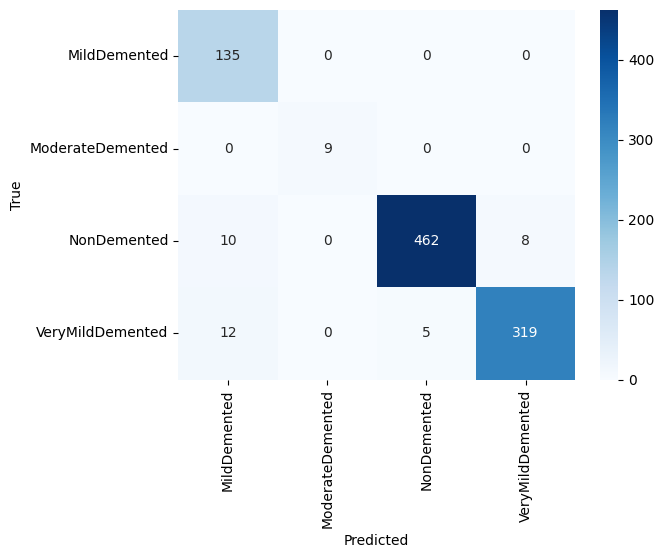

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       135
           1       1.00      1.00      1.00         9
           2       0.99      0.96      0.98       480
           3       0.98      0.95      0.96       336

    accuracy                           0.96       960
   macro avg       0.96      0.98      0.97       960
weighted avg       0.97      0.96      0.96       960



In [93]:
# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_generator.class_indices,
            yticklabels=test_generator.class_indices)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print(classification_report(y_true, y_pred_classes))

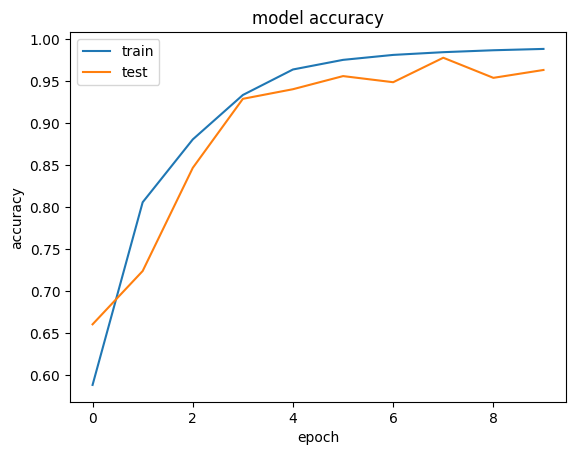

In [94]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

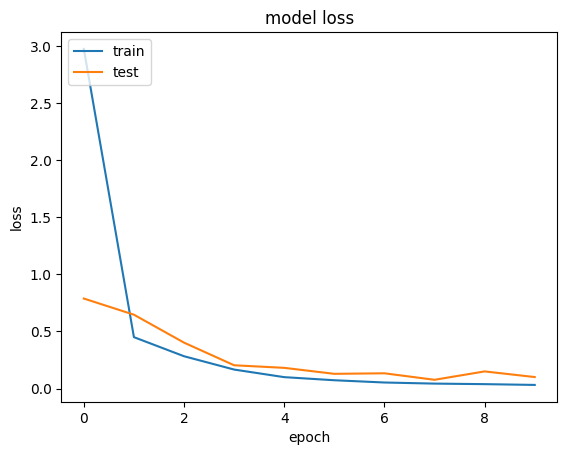

In [95]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Save the model and history into their respective files (keras and pickle)

In [96]:
# Create varibles to store the file names of the model and history 
model_name = model.name

# Set the version of the model
version = 'V2'

model_fullfilename = 'dementia_cnn_' + model_name + '_model_' + version + '.keras'
history_fullfilename = 'dementia_cnn_' + model_name + '_history_' + version + '.pkl'

print(model_fullfilename)
print(history_fullfilename)

dementia_cnn_sequential_4_model_V2.keras
dementia_cnn_sequential_4_history_V2.pkl


In [ ]:
# Save the model into an .keras file
model.save('saved_models/' + model_fullfilename)

# Save the history object into a pickle file
import pickle

with open('saved_models/' + history_fullfilename, 'wb') as file:
    pickle.dump(history.history, file)